In [1]:
using Plots

# this is a custom type that acts just like a Function
immutable F
   f::Function
end

[Plots.jl] Initializing backend: pyplot



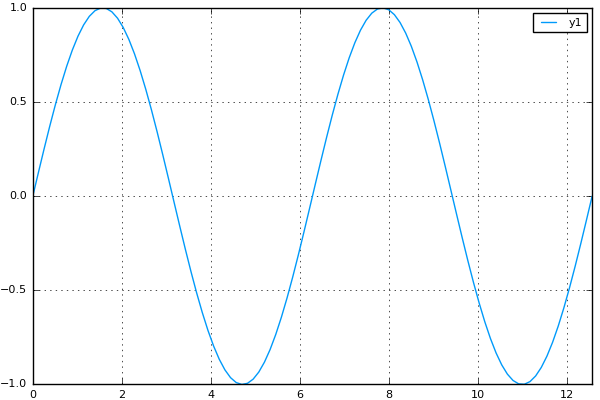

In [2]:
# We add this type as a Plots "type recipe".  This hook is called after initial Plots
# preprocessing (replacing aliases and other simple steps) but before the core
# data processing.  The return value is a tuple of the new arguments that will
# be passed along.
@recipe p(::Type{F}, f::F) = f.f

# In this example, a call to `plot(f, a, b, xlim=(-5,5))` is equivalent
# to the call `plot(f.f, a, b, xlim(-5,5))`
plot(F(sin), 0, 4π)


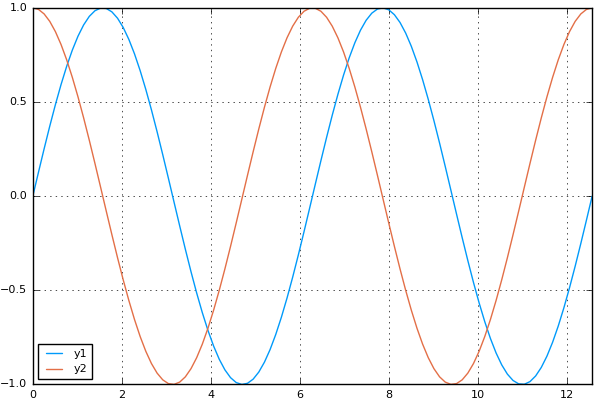

In [3]:
# we can add another definition for vectors of our custom type
@recipe p{A<:AbstractVector{F}}(::Type{A}, fs::A) = [f.f for f in fs]

v = [F(sin), F(cos)]
plot(v, 0, 4π)


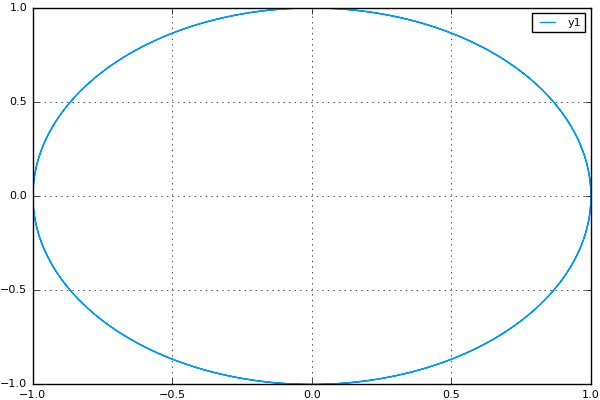

In [4]:
# 2D parametric
plot(F(sin), F(cos), 0, 4π)


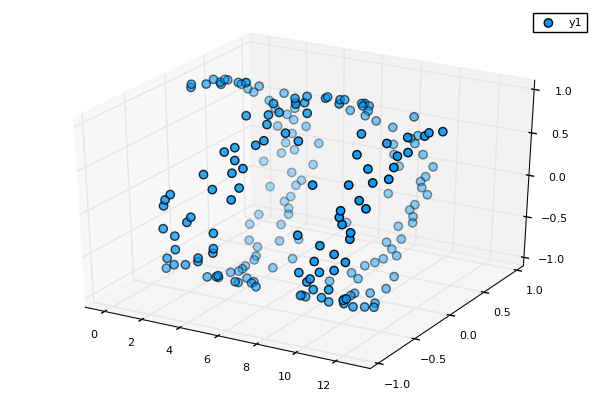

In [5]:
# 3D parametric
scatter3d(F(_->_+randn()), F(sin), F(cos), 0, 4π)


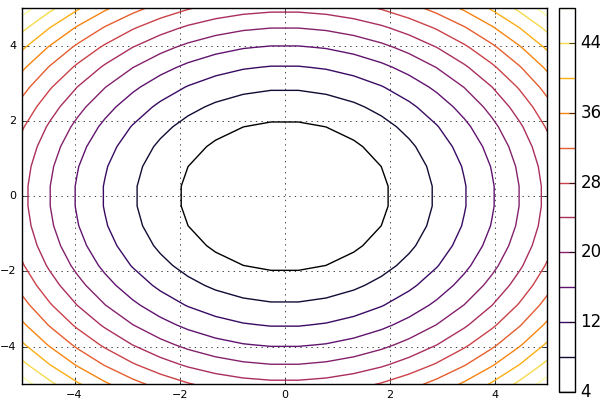

In [6]:
# contours/surfaces
x = linspace(-5, 5, 20)
y = x
f = F((x,y) -> x^2 + y^2)
contour(x, y, f)


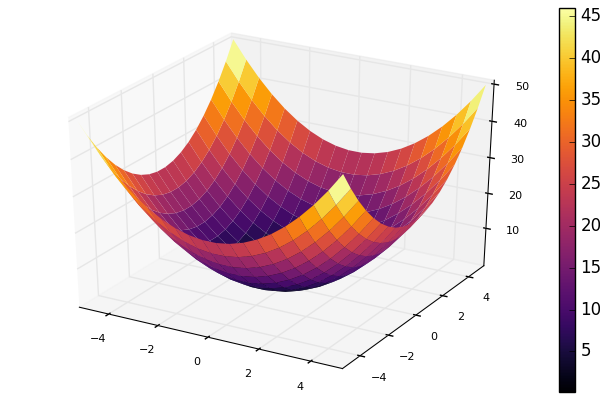

In [7]:
surface(x, y, f)